In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-tomatoes-best-soccer-movies/critic_reviews.csv/critic_reviews.csv
/kaggle/input/rotten-tomatoes-best-soccer-movies/movies.csv/movies.csv
/kaggle/input/rotten-tomatoes-best-soccer-movies/user_reviews.csv/user_reviews.csv


# imports and reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [3]:
df = pd.read_csv('/kaggle/input/rotten-tomatoes-best-soccer-movies/critic_reviews.csv/critic_reviews.csv')
df

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1913302,1992-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/150,Entertainment Weekly,"http://www.ew.com/ew/article/0,,310124,00.html",NaN,NEGATIVE,D+,e14e169b-f9b5-328e-b899-498c1c992114
1,1911370,1999-08-29,NaN,NaN,rotten,False,True,False,True,/critics/source/150,Entertainment Weekly,"http://www.ew.com/ew/article/0,,275269,00.html",NaN,NEGATIVE,C-,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
2,159555,2000-01-01,A.O. Scott,/critics/ao-scott,fresh,True,False,False,True,/critics/source/337,New York Times,http://www.nytimes.com/library/film/012800cup-...,NaN,POSITIVE,4/5,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
3,159557,2000-01-01,James Berardinelli,/critics/james-berardinelli,fresh,True,False,False,False,/critics/source/387,ReelViews,http://www.reelviews.net/movies/c/cup.html,NaN,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
4,159558,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-cup-2000,A delightful demonstration of how spirituality...,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,102908620,2024-05-01,Pablo O. Scholz,/critics/pablo-o-scholz,fresh,True,False,False,False,/critics/source/2677,Clarín,https://www.clarin.com/espectaculos/netflix-ju...,The Beautiful Game is an entertaining film tha...,POSITIVE,3/4,8ceb83ac-29a1-3688-9346-2760f618f934
2408,102908994,2024-05-02,Emma Donnelly,/critics/emma-donnelly,fresh,True,False,False,False,/critics/source/170,Film Ireland Magazine,https://filmireland.net/2024/04/30/review-the-...,The plot isn’t as blindly predictable as one m...,POSITIVE,NaN,8ceb83ac-29a1-3688-9346-2760f618f934
2409,102910004,2024-05-06,Gabe Dunn,/critics/gabe-dunn,fresh,True,False,False,True,/critics/source/1791,Autostraddle,https://www.autostraddle.com/shes-the-man-tran...,"It’s a very solid, very funny teen comedy.",POSITIVE,NaN,7e02a521-bb2c-33b8-b27d-ca0610c19c8f
2410,102910785,2024-05-09,James Marsh,/critics/james-marsh,fresh,True,False,False,False,/critics/source/2753,South China Morning Post,https://www.scmp.com/lifestyle/entertainment/a...,The Beautiful Game sets out to make a breezy&#...,POSITIVE,3/5,8ceb83ac-29a1-3688-9346-2760f618f934


# understanding the data

In [4]:
df.shape

(2412, 16)

In [5]:
df.head()

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1913302,1992-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/150,Entertainment Weekly,"http://www.ew.com/ew/article/0,,310124,00.html",NaN,NEGATIVE,D+,e14e169b-f9b5-328e-b899-498c1c992114
1,1911370,1999-08-29,NaN,NaN,rotten,False,True,False,True,/critics/source/150,Entertainment Weekly,"http://www.ew.com/ew/article/0,,275269,00.html",NaN,NEGATIVE,C-,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
2,159555,2000-01-01,A.O. Scott,/critics/ao-scott,fresh,True,False,False,True,/critics/source/337,New York Times,http://www.nytimes.com/library/film/012800cup-...,NaN,POSITIVE,4/5,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
3,159557,2000-01-01,James Berardinelli,/critics/james-berardinelli,fresh,True,False,False,False,/critics/source/387,ReelViews,http://www.reelviews.net/movies/c/cup.html,NaN,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
4,159558,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-cup-2000,A delightful demonstration of how spirituality...,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7


In [6]:
df.describe()

,reviewId
count,2.412000e+03
mean,1.203072e+07
std,3.055076e+07
min,2.671800e+04
25%,1.482188e+06
50%,1.821826e+06
75%,2.458182e+06
max,1.029184e+08


In [7]:
df.dtypes

reviewId            int64
creationDate       object
criticName         object
criticPageUrl      object
reviewState        object
isFresh              bool
isRotten             bool
isRtUrl            object
isTopCritic          bool
publicationUrl     object
publicationName    object
reviewUrl          object
quote              object
scoreSentiment     object
originalScore      object
movieId            object
dtype: object

In [8]:
df.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId'],
      dtype='object')

In [9]:
df = df[['reviewId', 'creationDate', 'criticName',
         #'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 
        # 'isRtUrl',
         'isTopCritic',
       #'publicationUrl'
          'publicationName',
         #'reviewUrl', 
         'quote',
       'scoreSentiment', 'originalScore', 'movieId']].copy()

In [10]:
df

,reviewId,creationDate,criticName,reviewState,isFresh,isRotten,isTopCritic,publicationName,quote,scoreSentiment,originalScore,movieId
0,1913302,1992-01-01,NaN,rotten,False,True,True,Entertainment Weekly,NaN,NEGATIVE,D+,e14e169b-f9b5-328e-b899-498c1c992114
1,1911370,1999-08-29,NaN,rotten,False,True,True,Entertainment Weekly,NaN,NEGATIVE,C-,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
2,159555,2000-01-01,A.O. Scott,fresh,True,False,True,New York Times,NaN,POSITIVE,4/5,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
3,159557,2000-01-01,James Berardinelli,fresh,True,False,False,ReelViews,NaN,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
4,159558,2000-01-01,Roger Ebert,fresh,True,False,True,Chicago Sun-Times,A delightful demonstration of how spirituality...,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
...,...,...,...,...,...,...,...,...,...,...,...,...
2407,102908620,2024-05-01,Pablo O. Scholz,fresh,True,False,False,Clarín,The Beautiful Game is an entertaining film tha...,POSITIVE,3/4,8ceb83ac-29a1-3688-9346-2760f618f934
2408,102908994,2024-05-02,Emma Donnelly,fresh,True,False,False,Film Ireland Magazine,The plot isn’t as blindly predictable as one m...,POSITIVE,NaN,8ceb83ac-29a1-3688-9346-2760f618f934
2409,102910004,2024-05-06,Gabe Dunn,fresh,True,False,True,Autostraddle,"It’s a very solid, very funny teen comedy.",POSITIVE,NaN,7e02a521-bb2c-33b8-b27d-ca0610c19c8f
2410,102910785,2024-05-09,James Marsh,fresh,True,False,False,South China Morning Post,The Beautiful Game sets out to make a breezy&#...,POSITIVE,3/5,8ceb83ac-29a1-3688-9346-2760f618f934


## renaming columns

In [11]:
df = df.rename(columns={'quote':'Quote'})

In [12]:
df.dtypes

reviewId            int64
creationDate       object
criticName         object
reviewState        object
isFresh              bool
isRotten             bool
isTopCritic          bool
publicationName    object
Quote              object
scoreSentiment     object
originalScore      object
movieId            object
dtype: object

In [13]:
df['creationDate']=pd.to_datetime(df['creationDate'])

In [14]:
df.dtypes

reviewId                    int64
creationDate       datetime64[ns]
criticName                 object
reviewState                object
isFresh                      bool
isRotten                     bool
isTopCritic                  bool
publicationName            object
Quote                      object
scoreSentiment             object
originalScore              object
movieId                    object
dtype: object

## missing values

In [15]:
df.isna().sum()

reviewId             0
creationDate         0
criticName          48
reviewState          0
isFresh              0
isRotten             0
isTopCritic          0
publicationName      0
Quote              118
scoreSentiment       0
originalScore      602
movieId              0
dtype: int64

In [16]:
df.shape

(2412, 12)

In [17]:
df=df.dropna()
df=df.reset_index(drop = True)

In [18]:
df.shape

(1677, 12)

725 rows were dropped

In [19]:
df.columns

Index(['reviewId', 'creationDate', 'criticName', 'reviewState', 'isFresh',
       'isRotten', 'isTopCritic', 'publicationName', 'Quote', 'scoreSentiment',
       'originalScore', 'movieId'],
      dtype='object')

In [20]:
df.head()

,reviewId,creationDate,criticName,reviewState,isFresh,isRotten,isTopCritic,publicationName,Quote,scoreSentiment,originalScore,movieId
0,159558,2000-01-01,Roger Ebert,fresh,True,False,True,Chicago Sun-Times,A delightful demonstration of how spirituality...,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
1,159570,2000-01-01,Frank Swietek,rotten,False,True,False,One Guy's Opinion,There are moments of real charm in The Cup...b...,NEGATIVE,C+,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
2,159590,2000-01-01,John A. Nesbit,fresh,True,False,False,Old School Reviews,proves the monks are far more human than stere...,POSITIVE,B,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
3,764719,2000-01-01,Dennis Schwartz,fresh,True,False,False,Dennis Schwartz Movie Reviews,If all you see is a bunch of kids watching a s...,POSITIVE,B+,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
4,43083,2000-01-01,Roger Ebert,rotten,False,True,True,Chicago Sun-Times,"In the right role, Olivia d'Abo would be irrep...",NEGATIVE,1.5/4,4237b32a-d262-3ad6-860a-908425c5ac71


## duplicates

In [21]:
df.loc[df.duplicated()]

,reviewId,creationDate,criticName,reviewState,isFresh,isRotten,isTopCritic,publicationName,Quote,scoreSentiment,originalScore,movieId


there are no duplicated rows, but we can find duplications in specific columns in the following cell.

# feature understanding

Text(0.5, 0, 'count')

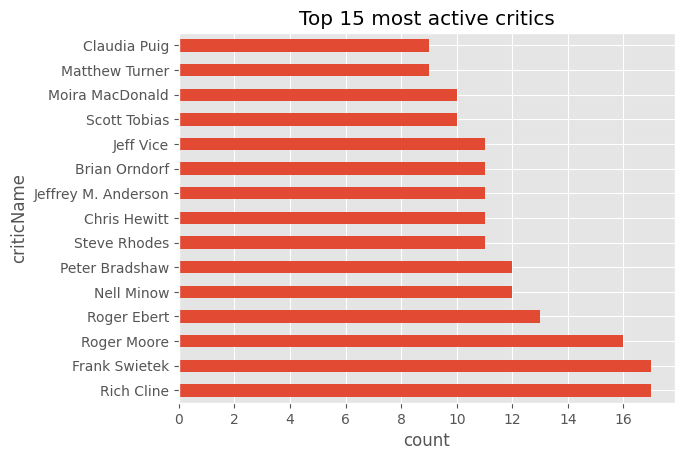

In [22]:
ax=df['criticName'].value_counts().head(15).plot(kind="barh",title='Top 15 most active critics')
ax.set_xlabel('count')

Text(0, 0.5, 'movie counts')

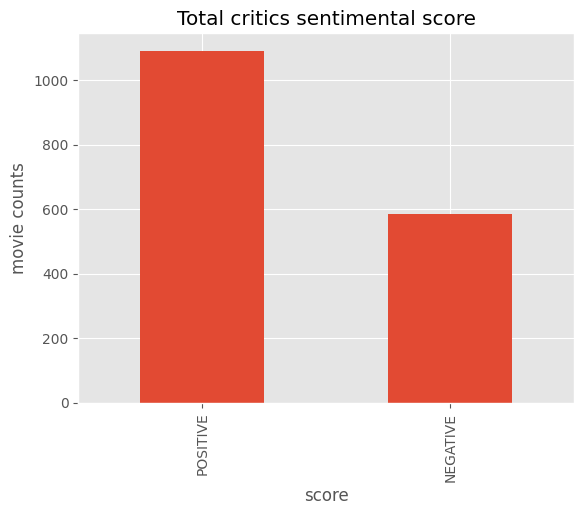

In [23]:
ax=df['scoreSentiment'].value_counts().plot(kind="bar",title='Total critics sentimental score')
ax.set_xlabel('score')
ax.set_ylabel('movie counts')

In [24]:
df['scoreSentiment'].value_counts()

scoreSentiment
POSITIVE    1091
NEGATIVE     586
Name: count, dtype: int64

## How many top critics are there?

In [25]:
df_q=df.query('isTopCritic == True')
df_q.shape

(555, 12)

there are 555 top movie critics in the data

# merging two dataframes

In [26]:
df.head()

,reviewId,creationDate,criticName,reviewState,isFresh,isRotten,isTopCritic,publicationName,Quote,scoreSentiment,originalScore,movieId
0,159558,2000-01-01,Roger Ebert,fresh,True,False,True,Chicago Sun-Times,A delightful demonstration of how spirituality...,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
1,159570,2000-01-01,Frank Swietek,rotten,False,True,False,One Guy's Opinion,There are moments of real charm in The Cup...b...,NEGATIVE,C+,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
2,159590,2000-01-01,John A. Nesbit,fresh,True,False,False,Old School Reviews,proves the monks are far more human than stere...,POSITIVE,B,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
3,764719,2000-01-01,Dennis Schwartz,fresh,True,False,False,Dennis Schwartz Movie Reviews,If all you see is a bunch of kids watching a s...,POSITIVE,B+,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7
4,43083,2000-01-01,Roger Ebert,rotten,False,True,True,Chicago Sun-Times,"In the right role, Olivia d'Abo would be irrep...",NEGATIVE,1.5/4,4237b32a-d262-3ad6-860a-908425c5ac71


In [27]:
df_m=pd.read_csv('/kaggle/input/rotten-tomatoes-best-soccer-movies/movies.csv/movies.csv')
df_m

,movieId,movieTitle,movieYear,movieURL,movieRank,critic_score,audience_score
0,144d8fde-a175-3e4b-9c7c-327e99fd956d,Offside,2006,https://www.rottentomatoes.com/m/offside,1,94%,74%
1,91217a2b-9d80-3451-948e-f47d9334ca16,The Damned United,2009,https://www.rottentomatoes.com/m/damned_united,2,92%,85%
2,cfd33721-a653-43f7-b6e2-9321119e7948,Diego Maradona,2019,https://www.rottentomatoes.com/m/diego_maradona,3,90%,NaN
3,3da46dee-cea6-3eb6-923c-509b93e845fa,Shaolin Soccer,2001,https://www.rottentomatoes.com/m/shaolin_soccer,4,89%,84%
4,55f6efc8-0f2f-3cad-909f-13a40923f610,Bend It Like Beckham,2002,https://www.rottentomatoes.com/m/bend_it_like_...,5,85%,73%
5,52ef3430-ee4a-3213-a8f6-35b3aaa4aeba,Looking for Eric,2009,https://www.rottentomatoes.com/m/looking_for_eric,6,84%,78%
6,2c229f81-96a6-3243-86d9-d9afc626989a,Once in a Lifetime: The Extraordinary Story of...,2006,https://www.rottentomatoes.com/m/10006849-once...,7,81%,80%
7,18c5a6d2-cdfe-3c3e-b8a9-9d934a4a4077,Early Man,2018,https://www.rottentomatoes.com/m/early_man,8,81%,49%
8,4966301c-ec9e-3638-9b68-814177bd9891,Next Goal Wins,2014,https://www.rottentomatoes.com/m/next_goal_wins,9,100%,89%
9,385149c7-d935-4adc-8e66-416d0756ebe6,Sir Alex Ferguson: Never Give In,2021,https://www.rottentomatoes.com/m/sir_alex_ferg...,10,100%,96%


In [28]:
df_merged = pd.merge(df, df_m, on='movieId')
df_merged

,reviewId,creationDate,criticName,reviewState,isFresh,isRotten,isTopCritic,publicationName,Quote,scoreSentiment,originalScore,movieId,movieTitle,movieYear,movieURL,movieRank,critic_score,audience_score
0,159558,2000-01-01,Roger Ebert,fresh,True,False,True,Chicago Sun-Times,A delightful demonstration of how spirituality...,POSITIVE,3/4,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7,The Cup,1999,https://www.rottentomatoes.com/m/the_cup_1999,16,85%,86%
1,159570,2000-01-01,Frank Swietek,rotten,False,True,False,One Guy's Opinion,There are moments of real charm in The Cup...b...,NEGATIVE,C+,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7,The Cup,1999,https://www.rottentomatoes.com/m/the_cup_1999,16,85%,86%
2,159590,2000-01-01,John A. Nesbit,fresh,True,False,False,Old School Reviews,proves the monks are far more human than stere...,POSITIVE,B,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7,The Cup,1999,https://www.rottentomatoes.com/m/the_cup_1999,16,85%,86%
3,764719,2000-01-01,Dennis Schwartz,fresh,True,False,False,Dennis Schwartz Movie Reviews,If all you see is a bunch of kids watching a s...,POSITIVE,B+,1b7b7ed1-b91c-3928-bc89-3a1cf554cab7,The Cup,1999,https://www.rottentomatoes.com/m/the_cup_1999,16,85%,86%
4,43083,2000-01-01,Roger Ebert,rotten,False,True,True,Chicago Sun-Times,"In the right role, Olivia d'Abo would be irrep...",NEGATIVE,1.5/4,4237b32a-d262-3ad6-860a-908425c5ac71,The Big Green,1995,https://www.rottentomatoes.com/m/big_green,51,0%,46%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,102902585,2024-04-08,Robert Levin,rotten,False,True,True,Newsday,There's hardly anything in “The Beautiful Game...,NEGATIVE,2/4,8ceb83ac-29a1-3688-9346-2760f618f934,The Beautiful Game,2024,https://www.rottentomatoes.com/m/the_beautiful...,14,85%,67%
1673,102907088,2024-04-24,Avaryl Halley,rotten,False,True,False,Movie Bitches,More Rodney Dangerfield Less Sports&#8230;that...,NEGATIVE,6/10,e14e169b-f9b5-328e-b899-498c1c992114,Ladybugs,1992,https://www.rottentomatoes.com/m/ladybugs,48,14%,43%
1674,102907089,2024-04-24,Andrew Galdi,rotten,False,True,False,Movie Bitches,Jack&#233;e alone gives it 20&#37; on Rotten T...,NEGATIVE,4.5/10,e14e169b-f9b5-328e-b899-498c1c992114,Ladybugs,1992,https://www.rottentomatoes.com/m/ladybugs,48,14%,43%
1675,102908620,2024-05-01,Pablo O. Scholz,fresh,True,False,False,Clarín,The Beautiful Game is an entertaining film tha...,POSITIVE,3/4,8ceb83ac-29a1-3688-9346-2760f618f934,The Beautiful Game,2024,https://www.rottentomatoes.com/m/the_beautiful...,14,85%,67%


## top 10 most reviewed movies

In [29]:
df_merged['movieTitle'].value_counts().head(10)

movieTitle
Next Goal Wins          137
Early Man               135
Bend It Like Beckham    117
Kicking & Screaming     113
The Damned United        92
She's the Man            91
Looking for Eric         77
Rudo y Cursi             75
Gracie                   74
Shaolin Soccer           70
Name: count, dtype: int64

In [30]:
df_merged['movieRank'].sort_values().head(10)

745    1
662    1
618    1
714    1
660    1
659    1
658    1
657    1
656    1
655    1
Name: movieRank, dtype: int64

# the top 5 best ranked movies

In [31]:
dfa=df_merged.query('movieRank == [1,2,3,4,5]').sort_values(by='movieRank').drop_duplicates(subset=['movieRank'])
dfa['movieTitle'].reset_index(drop=True)

0                 Offside
1       The Damned United
2          Diego Maradona
3          Shaolin Soccer
4    Bend It Like Beckham
Name: movieTitle, dtype: object